# **Applied Statistics Problems Notebook**

This notebook contains my answers to each of the four problems outlined in the assessment of the Applied Statistics module. These problems are:

| Problem | Title | What the Task Involves |
| :--  | :---: |  :---:  |
| 1 | Extending the Lady Tasting Tea | Expanding Fisher's Lady Tasting experiment so that there are 12 cups: 8 tea-first and 4 milk-first |
| 2 | Normal Distribution | Generating many samples from a standard normal distribution to compare the behaviour of the sample standard deviation (ddof=1) with the population standard deviation (ddof=0). |
| 3 | t-Tests | Simulating a Type II error by repeatedly generating two samples (one from N(0,1) and one from N(d,1)), running a t-test 1,000 times for each d=0,0.1,…,1.0, and recording how often the null is not rejected. Then plotting this proportion versus d to show how the Type II error rate decreases as the true mean difference increases. |
| 4 | ANOVA | |

The aim of the notebook is to show an understanding of the key principles of statistics and to demonstrate the following abilities, taken from the learning outcomes of the module:

- Describe the stochastic nature of real-world measurements.

- Source documentation to programmatically perform a statistical test.

- Select an appropriate statistical test to investigate a claim.

- Perform a statistical test on a data set.

Within this notebook, `code blocks` are used wherever code is referenced.

***
## Imports

Before we begin addressing the problems we will import the relevant packages that will be called on throughout the workbook:

In [62]:
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Statistical plots.
import seaborn as sns

***
## Problem 1: Extending the Lady Tasting Tea

The Lady Tasting Tea experiment is a randomised experiment devised by Ronald Fisher (*The Design of Experiments* (1935)). In the experiment, 8 randomly ordered cups of tea are prepared: 4 of those cups of tea are prepared with milk followed by tea and 4 get tea first followed by milk. A participant claims they can distinguish the 2 sets of cups of tea from one another without seeing them being prepared.

The null hypothesis of the experiment is that the subject drinking the tea is not able to distinguish whether the cup they are drinking from had the tea or milk poured in it first.

In this first problem I will extend the Lady Tasting Tea experiment so that there are 12 cups: 8 tea-first and 4 milk-first.

I will use `numpy` to randomly shuffle the cups many times and then calculate the probability of the participant correctly identifying all cups by chance. `numpy` is a module used for numerical computing. We will use it to support multidimensional arrays (the [NumPy Reference Manual](https://numpy.org/doc/stable/reference/index.html#reference) contains guidance on using the module).

Let's begin by defining the cups of tea that will be available in the set, in this version of the experiment there will be 4 with milk first and 8 with tea first.

In [63]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk first.
no_cups_milk_first = 4

# Number of cups of tea with tea first.
no_cups_tea_first = 8

`Math.comb` is a function we can use to find out how many ways to choose k items from n items without repetition and without order ([Python's math.comb documentation](https://docs.python.org/3/library/math.html#math.comb) provides information on the same).

We will use it here to find out how many ways there are to select four cups from 12.

In [64]:
# Number of ways of selecting four cups from 12.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

Evidently there are 495 ways to select four cups from 12.

Now let's work out the probability that the participant in this experiment guesses the four cups correctly.

In [65]:
# Probability that the participant randomly selects the four correct cups.
p_all_correct = 1 / ways

# Show.
p_all_correct

0.00202020202020202

We can now simulate the experiment a number of times (100,000 times to give us a more accurate result).

In doing so we will count the number of times the participant correctly identifies all four milk-first cups.

In [66]:
# Number of simulations.
n_sims = 100000

# The true cups with milk in first (we label them as cups 0, 1, 2, 3).
true_milk = set(range(no_cups_milk_first))

# Using NumPy to randomly shuffle cups.
rng = np.random.default_rng()
#We will use hits as a variable to count correct guesses.
hits = 0

for _ in range(n_sims):
    cups = np.arange(no_cups)
    rng.shuffle(cups)
    # The participant’s guess.
    guess = set(cups[:no_cups_milk_first])
    # If the guess is correct the hits variable grows by 1.
    if guess == true_milk:
        hits += 1

# Estimating the probability.
simulated_p = hits / n_sims

# Printing the results (to 6 decimal places).
print(f"Simulated probability of all correct: {simulated_p:.6f}")
print(f"Exact probability: {p_all_correct:.6f}")

Simulated probability of all correct: 0.002060
Exact probability: 0.002020


In this simulation, I used `Numpy` to randomly shuffle 12 cups (8 tea-first and 4 milk-first) to estimate the probability of a participant correctly identifying all cups by chance.

In this extended 12-cup experiment the probability of correctly identifying all cups by chance is 1 in 495 (p is roughly 0.002) compared to 1 in 70 (p is roughly 0.0143) in the original 8-cup version. This means that perfectly guessing the cups is far less likely in the extended experiment.

This indicates that the extended experiment is more stringent, so we would not need to lower the p-value threshold, and could even relax it slightly since achieving a perfect result is already far less likely by chance.

***
## Problem 2: Normal Distribution

For the second task I will generate 100,000 samples of size 10 from the standard normal distribution. Normal distribution is a common way that data tends to be spread, with most values close to the average and fewer values as you move either side of that average (See [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)'s Normal Distribution article). Data with a normal distribution produces the classic "bell curve" shape when displayed on a plot.

For each of the 100,000 samples, I will compute the standard deviation (a measure of how spread out the values in a dataset are from their mean (see [Laerd Statistics](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) for further information on standard deviation)) with ddof=1 (sample SD) and with ddof=0 (population SD).

Following this, I will plot histograms of both sets of values on the same axes with transparency and speak about the differences between the two sets.

In this task we will use `matplotlib` to help with plotting. `matplotlib` is a plotting library. Pyplot allows for interactive plots and programmatic plot generation ([matplotlib](https://matplotlib.org/stable/contents.html) and [Real Python](https://realpython.com/python-matplotlib-guide/) have useful guides for the various different plots you can create with this library).

We have already encountered `numpy` in the previous task which will be of use in this task also.

Let's begin the task by using `numpy`'s `random` module to generate 100,000 samples of size 10 from the standard normal distribution. Using 100,000 samples allows us to approximate the sampling distribution of the standard deviation very accurately.

In [67]:
# Drawing 100,000 samples.
n_samples = 100000

# Determining the size of each sample.
sample_size = 10

# The shape here is (100000, 10).
samples = np.random.normal(0, 1, size=(n_samples, sample_size))

# Show.
samples

array([[-0.91801182, -0.3614478 ,  1.99895914, ...,  2.12974119,
        -2.07773794,  0.47588762],
       [ 0.26949218,  1.01858183, -0.97331432, ..., -0.67628464,
         0.17756763, -0.81130799],
       [ 1.26028645, -1.18515168,  0.42712418, ..., -2.40102166,
        -0.09148249, -0.61835619],
       ...,
       [-0.9082412 , -1.41227812, -0.76713854, ...,  0.27312212,
         1.49622621, -1.95050917],
       [ 1.65674308, -0.90202969,  0.6376679 , ..., -0.49382611,
         0.69411416,  0.37084273],
       [-0.5009313 ,  0.57181332,  0.21223934, ...,  1.21393377,
        -0.5584066 , -1.64421847]])

For each sample, I will compute the standard deviation with ddof=1 (sample standard deviation) and with ddof=0 (population standard deviation).

`ddof` controls what number you divide by when computing variance or standard deviation.

`ddof=1` divides by N-1 while `ddof=0` divides by N.

In [68]:
# Sample SD.
sd_ddof1 = samples.std(axis=1, ddof=1)

# Population SD.
sd_ddof0 = samples.std(axis=1, ddof=0)

Now that we have the standard deviation of each sample I will plot histograms (a graphical representation of the distribution of a set of continuous numerical data, again [matplotlib](https://matplotlib.org/stable/contents.html)'s documentation outlines the various plots you can produce when using the plotting library) of both sets of values on the same axes. We can achieve transparency by using `alpha`.

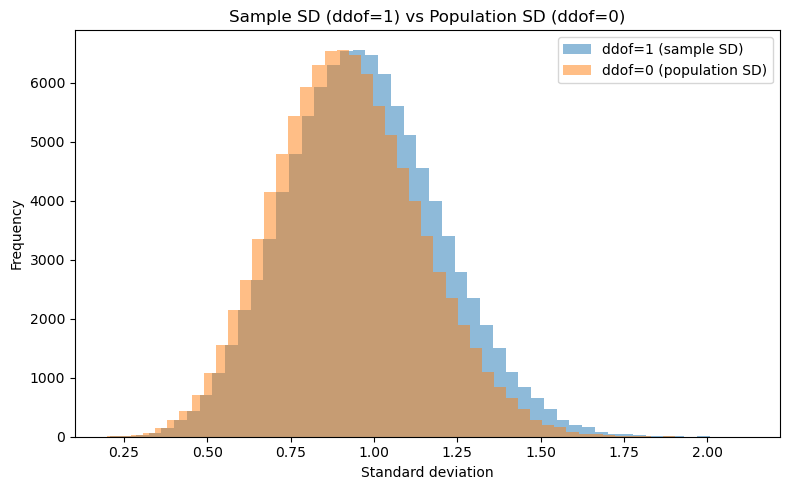

In [69]:
# Plotting the histograms.
plt.figure(figsize=(8, 5))
# Plotting the sample SD and population SD.
plt.hist(sd_ddof1, bins=50, alpha=0.5, label="ddof=1 (sample SD)")
plt.hist(sd_ddof0, bins=50, alpha=0.5, label="ddof=0 (population SD)")
# X & Y axis labels.
plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
# Title.
plt.title("Sample SD (ddof=1) vs Population SD (ddof=0)")
# Adding a legend.
plt.legend()
# Adjusting to a tight layout.
plt.tight_layout()
# Displaying the plot.
plt.show()

In the above plot we can see the population SD in orange and sample SD in blue. The ddof=1 distribution is centred slightly to the right of the ddof=0 distribution, reflecting its unbiased nature.

Using `ddof=1` (sample SD) divides by N-1 and gives a better estimate when using a sample, while `ddof=0` (population SD) divides by N and is slightly biased low. This experiment shows that ddof=1 is preferred when estimating the true population variability from a finite sample.

***
## Problem 3: t-Tests

A t-test is a statistical test used to determine whether the means of two groups are significantly different from each other. It compares the difference between group means relative to the variation within the groups. By calculating a t value and its corresponding p value, the test helps assess whether an observed difference is likely due to chance or reflects a real effect (see [Laerd Statistics](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php) for further information).

A type II error occurs when a test fails to reject the null hypothesis even though it is false.

In this task I will repeat the following simulation 1,000 times for each mean difference d = 0 , 0.1 , 0.2, … , 1.0:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean 
d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

First, using `np.arrange` ([NumPy Documentation](https://numpy.org/doc/2.1/reference/generated/numpy.arange.html)), I will define each of the mean differences between 0 and 1.0:

In [70]:
# Mean differences d = 0, 0.1, ..., 1.0
# arange pulls evenly spaced values within a given interval.
# https://numpy.org/doc/2.1/reference/generated/numpy.arange.html
ds = np.arange(0, 1.01, 0.1)

Having done that, I will now define the parameters for the two samples.

I will also create a variable `type2rates` to track the type II error rates.

In [71]:
# sample size.
n = 100 
# number of simulations per d.    
n_sims = 1000 
# significance level.
alpha = 0.05     

# Recording Type II error rates (proportion of non-rejections).
type2rates = []


In [72]:
# ds is the array of mean differences (0 to 1.0).
for d in ds:
    # Creating a count for how many times the t-test did not reject the null.
    non_rejects = 0
    
    for _ in range(n_sims):
        # Group from N(0, 1).
        group_a = np.random.normal(0.0, 1.0, n)
        # Group from N(d, 1).
        group_b = np.random.normal(d, 1.0, n)
        
        # Independent samples t-test.
        t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=True)
        
        if p_value >= alpha:
            non_rejects += 1
    
    # Proportion of non-rejections for this d.
    type2rate = non_rejects / n_sims
    type2rates.append(type2rate)

***
## Problem 4: ANOVA

In this final task

***


## References

| Author                                 | Title                                                                                                         | Blurb                           |
| :---                                   |    :----:                                                                                                     |          :---:                  |
| Wikimedia Commons | [ Chardin, 'A Lady Taking Tea' ](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Chardin_-_A_Lady_Taking_Tea%2C_1735.jpg/960px-Chardin_-_A_Lady_Taking_Tea%2C_1735.jpg) | Cover image used in this repositories README, Jean-Baptiste-Siméon Chardin: A Lady Taking Tea (1735). |
| Ronald Fisher | The Design of Experiments (1935) | Ronald Fishers book on experimental design which contains the Lady Tasting Tea experiment. |
| Python Documentation | [Python math.comb documentation](https://docs.python.org/3/library/math.html#math.comb) | Pythons math.comb documentation. |
| Python Documentation | [Python's math module documentation](https://docs.python.org/3/library/math.html) | Information on python's math module. |
| NumPy API Reference | [NumPy Reference Manual](https://numpy.org/doc/stable/reference/index.html#reference) | This reference manual details functions, modules, and objects included in NumPy, describing what they are and what they do. |
| Matplotlib | [Matplotlib Guide](https://matplotlib.org/stable/contents.html) | Guide to plotting with Matplotlib. |
| Laerd Statistics | [Standard Deviation](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) | Laerd Statistics overview of standard deviation. |
| Laerd Statistics | [Independent t-test for two samples](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php) | Laerd Statistics guide to t-tests. |
| Wikipedia | [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) | Normal Distribution Wikipedia article. |
| GitHub Docs | [*Basic writing and formatting syntax: Create sophisticated formatting for your prose and code on GitHub with simple syntax*](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) | Guide for the basics of markdown used throughout this notebook; stylising text, making lists, adding images, etc. |
| Solomon, Brad. Real Python | [*Python Plotting with Matplotlib (Guide)*](https://realpython.com/python-matplotlib-guide/) | Lots of useful information on plotting. |
| NumPy Documentation | [NumPy Guide to Arange](https://numpy.org/doc/2.1/reference/generated/numpy.arange.html) | NumPy guide to arange. |

***

## End

***